In [1]:
from lattice_builder import *
import numpy as np
import scipy
from ODA import *

%matplotlib widget
# make a dictionary to store the results of these various tests
results = {}


# The ODA works best when there are many ommatidia

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=118	mean=4.2881	std=5.6247	fft=3.1382

29.5
ERROR!
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=50	mean=15.4192	std=16.3345	fft=2.952

3.5714285714285716
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=38	mean=34.8995	std=0.5619	fft=3.7683

1.0
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=99	mean=21.1714	std=0.8008	fft=15.1312

0.9428571428571428
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=279	mean=12.4774	std=0.2459	fft=9.0235

1.0
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=780	mean=7.4186	std=0.2903	fft=5.3563

1.0
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=2083	mean=4.2737	std=0.2379	fft=3.2303

0.9688372093023255
Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=1916	mean=4.1298	std=0.4041	fft=6.1224

0.32061579651941097
Eye: 	Area = 41599.889	

C:\Users\johnp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ODA\analysis_tools.py:1515: RuntimeWarning: invalid value encountered in divide
  correlations = self.reciprocal/self.reciprocal.max()
C:\Users\johnp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ODA\analysis_tools.py:1533: RuntimeWarning: Mean of empty slice.
  self.correlation_val = key_vals[:6].mean()
C:\Users\johnp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\johnp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ODA\analysis_tools.py:1561: RuntimeWarning: Mean of empty slice.
  self.om

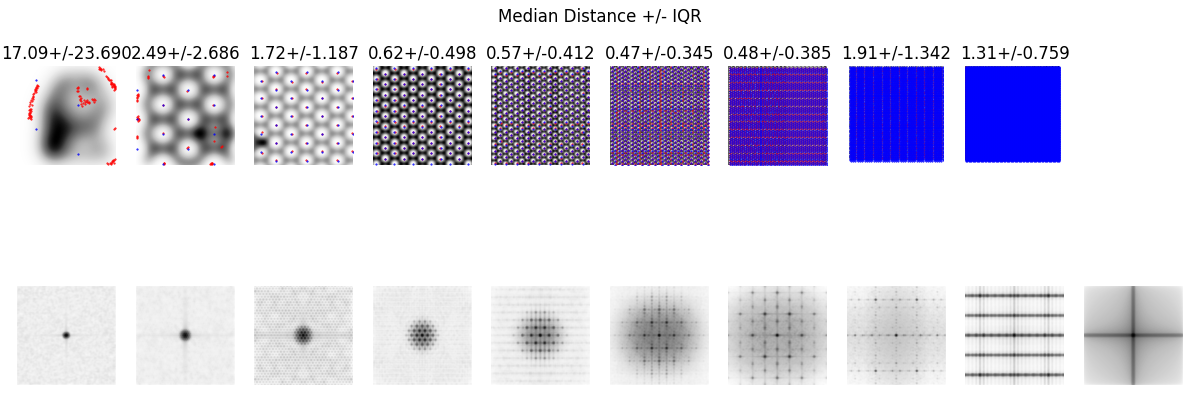

In [2]:

# add a dictionary of the results from this scale test
results['scale'] = {'xvals':[], 'count_prop':[], 'diam_prop':[], 'dist_med':[], 'dist_iqr':[]}

scales = np.logspace(0, 2, 10)[::-1]
fig, axes = plt.subplots(ncols=len(scales), nrows=3 ,figsize=(12, 4))
for scale, row in zip(scales, axes.T):
        lattice = Lattice()
        img = lattice.simulate_eye(scale=scale, xres=200, yres=200)
        row[0].imshow(img, cmap='Greys')
        # apply the ODA to this image and get the lens centers
        mask = np.ones(img.shape, dtype=bool)
        # mask = img > 0
        stack = Eye(arr=img, mask_arr=mask)
        stack.oda(bright_peak=False, regular=True)
        if len(stack.ommatidial_inds) > 0:
            ys, xs = stack.ommatidial_inds.T
            row[0].scatter(xs, ys, color='r', marker='.', s=1)
            # measure the distribution of nearest distances between pairs of input and output ommatidial centers
            input_centers = lattice.pts
            include = np.all((input_centers > 0)*(input_centers < img.shape[0]), axis=1)
            input_centers = input_centers[include]
            ys, xs = input_centers.T
            row[0].scatter(xs, ys, color='b', marker='.', s=1)
            output_centers = stack.ommatidial_inds
            dist_tree = scipy.spatial.KDTree(output_centers)
            dists, inds = dist_tree.query(input_centers)
            low, mid, high = np.percentile(dists, [25, 50, 75])
            med, iqr = mid, high-low
            row[0].set_title(f"{med:.2f}+/-{iqr:.3f}")
            # measure the input diameter and compare to the resultant one
            dist_tree = scipy.spatial.KDTree(input_centers)
            dists, inds = dist_tree.query(input_centers, k=5)
            dists = dists[:, 1:]
            diam_input = np.median(dists)
            print(len(output_centers)/len(input_centers))
            if len(output_centers)/len(input_centers) > 5:
                print("ERROR!")
            # store results
            results['scale']['count_prop'] += [len(output_centers)/len(input_centers)]
            results['scale']['diam_prop'] += [stack.ommatidial_diameter/diam_input]
            results['scale']['dist_med'] += [med/diam_input]
            results['scale']['dist_iqr'] += [iqr/diam_input]
        else:
            results['scale']['count_prop'] += [np.nan]
            results['scale']['diam_prop'] += [np.nan]
            results['scale']['dist_med'] += [np.nan]
            results['scale']['dist_iqr'] += [np.nan]
        # results['scale']['xvals'] += [scale]
        results['scale']['xvals'] += [diam_input]
        # results['scale']['xvals'] += [len(input_centers)]

        # plot the reciprocal image too
        row[2].imshow(np.log(reciprocal(img)), cmap='Greys')
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    sbn.despine(ax=ax, bottom=True, left=True)
plt.suptitle("Median Distance +/- IQR")
plt.tight_layout()
plt.show()

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=780	mean=7.4186	std=0.2903	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=780	mean=7.4076	std=0.2911	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=777	mean=7.3559	std=0.2675	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=779	mean=7.3148	std=0.2672	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=773	mean=7.1907	std=0.3164	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=775	mean=7.105	std=0.3865	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=773	mean=6.9851	std=0.4361	fft=5.3563

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Failed to find fundamental frequencies.
Ommatidia: 	N=0	mean=nan	std=nan	fft=nan

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Failed to find fundamental frequencies.
Omma

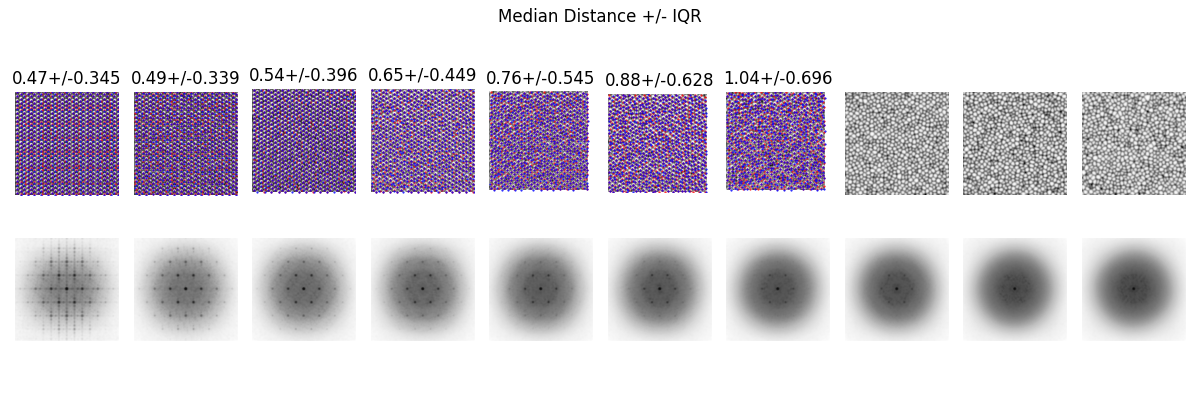

In [3]:
# add a dictionary of the results from this scale test
results['noise_regular'] = {'xvals':[], 'count_prop':[], 'diam_prop':[], 'dist_med':[], 'dist_iqr':[]}

# scales = np.logspace(0, 2, 10)[3:][::-1]
scale = scales[5]
noise_stds = np.linspace(0, scale/2, 10)
fig, axes = plt.subplots(ncols=len(noise_stds), nrows=2, figsize=(12, 4))
for std, row in zip(noise_stds, axes.T):
    lattice = Lattice()
    img = lattice.simulate_eye(scale=scale, xres=200, yres=200, noise=std, noise_model='uniform')
    row[0].imshow(img, cmap='Greys')
    # apply the ODA to this image and get the lens centers
    mask = np.ones(img.shape, dtype=bool)
    # mask = img > 0
    stack = Eye(arr=img, mask_arr=mask)
    stack.oda(bright_peak=False, regular=True)
    if len(stack.ommatidial_inds) > 0:
        ys, xs = stack.ommatidial_inds.T
        row[0].scatter(xs, ys, color='r', marker='.', s=1)
        # measure the distribution of nearest distances between pairs of input and output ommatidial centers
        input_centers = lattice.pts
        include = np.all((input_centers > 0)*(input_centers < img.shape[0]), axis=1)
        input_centers = input_centers[include]
        ys, xs = input_centers.T
        row[0].scatter(xs, ys, color='b', marker='.', s=1)
        output_centers = stack.ommatidial_inds
        dist_tree = scipy.spatial.KDTree(output_centers)
        dists, inds = dist_tree.query(input_centers)
        low, mid, high = np.percentile(dists, [25, 50, 75])
        med, iqr = mid, high-low
        row[0].set_title(f"{med:.2f}+/-{iqr:.3f}")
        # meaure the input diameter
        dist_tree = scipy.spatial.KDTree(input_centers)
        dists, inds = dist_tree.query(input_centers, k=7)
        dists = dists[:, 1:]
        diam_input = np.median(dists)
        # store results
        results['noise_regular']['count_prop'] += [len(output_centers)/len(input_centers)]
        results['noise_regular']['diam_prop'] += [stack.ommatidial_diameter/diam_input]
        results['noise_regular']['dist_med'] += [med/diam_input]
        results['noise_regular']['dist_iqr'] += [iqr/diam_input]
    else:
        results['noise_regular']['count_prop'] += [np.nan]
        results['noise_regular']['diam_prop'] += [np.nan]
        results['noise_regular']['dist_med'] += [np.nan]
        results['noise_regular']['dist_iqr'] += [np.nan]
    results['noise_regular']['xvals'] += [std/scale]
    # plot the reciprocal image too
    row[1].imshow(np.log(reciprocal(img)), cmap='Greys')
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    sbn.despine(ax=ax, bottom=True, left=True)
plt.suptitle("Median Distance +/- IQR")
plt.tight_layout()
plt.show()

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=739	mean=7.4802	std=0.2926	fft=7.8567

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=741	mean=7.4529	std=0.2927	fft=7.0711

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=742	mean=7.3876	std=0.2673	fft=7.0711

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=742	mean=7.3036	std=0.231	fft=7.0711

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=740	mean=7.2679	std=0.2976	fft=7.0711

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=497	mean=8.4953	std=0.6942	fft=8.8388

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=498	mean=8.3064	std=0.6278	fft=8.8388

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=499	mean=8.417	std=0.6801	fft=8.8388

Eye: 	Area = 41599.889	Length = 230.276	Width = 230.013
Ommatidia: 	N=500	mean=8.4149	std=0.7603	fft=8.8388

Eye: 	Area = 41599.88

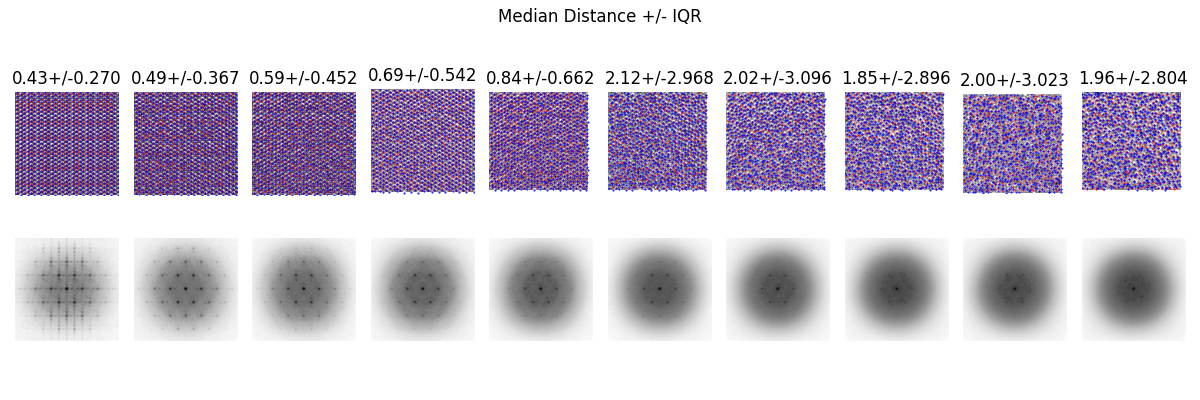

In [4]:
# add a dictionary of the results from this scale test
results['noise_irregular'] = {'xvals':[], 'count_prop':[], 'diam_prop':[], 'dist_med':[], 'dist_iqr':[]}

# scales = np.logspace(0, 2, 10)[3:][::-1]
scale = scales[5]
noise_stds = np.linspace(0, scale/2, 10)
fig, axes = plt.subplots(ncols=len(noise_stds), nrows=2, figsize=(12, 4))
for std, row in zip(noise_stds, axes.T):
    lattice = Lattice()
    img = lattice.simulate_eye(scale=scale, xres=200, yres=200, noise=std, noise_model='uniform')
    row[0].imshow(img, cmap='Greys')
    # apply the ODA to this image and get the lens centers
    mask = np.ones(img.shape, dtype=bool)
    # mask = img > 0
    stack = Eye(arr=img, mask_arr=mask)
    stack.oda(bright_peak=False, regular=False)
    if len(stack.ommatidial_inds) > 0:
        ys, xs = stack.ommatidial_inds.T
        row[0].scatter(xs, ys, color='r', marker='.', s=1)
        # measure the distribution of nearest distances between pairs of input and output ommatidial centers
        input_centers = lattice.pts
        include = np.all((input_centers > 0)*(input_centers < img.shape[0]), axis=1)
        input_centers = input_centers[include]
        ys, xs = input_centers.T
        row[0].scatter(xs, ys, color='b', marker='.', s=1)
        output_centers = stack.ommatidial_inds
        dist_tree = scipy.spatial.KDTree(output_centers)
        dists, inds = dist_tree.query(input_centers)
        low, mid, high = np.percentile(dists, [25, 50, 75])
        med, iqr = mid, high-low
        row[0].set_title(f"{med:.2f}+/-{iqr:.3f}")
        # measure the input diameter and compare to the resultant one
        dist_tree = scipy.spatial.KDTree(input_centers)
        dists, inds = dist_tree.query(input_centers, k=5)
        dists = dists[:, 1:]
        diam_input = np.median(dists)
        # store results
        results['noise_irregular']['count_prop'] += [len(output_centers)/len(input_centers)]
        results['noise_irregular']['diam_prop'] += [stack.ommatidial_diameter/diam_input]
        results['noise_irregular']['dist_med'] += [med/diam_input]
        results['noise_irregular']['dist_iqr'] += [iqr/diam_input]
    else:
        results['noise_irregular']['count_prop'] += [np.nan]
        results['noise_irregular']['diam_prop'] += [np.nan]
        results['noise_irregular']['dist_med'] += [np.nan]
        results['noise_irregular']['dist_iqr'] += [np.nan]
    results['noise_irregular']['xvals'] += [std/scale]
    # plot the reciprocal image too
    row[1].imshow(np.log(reciprocal(img)), cmap='Greys')
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    sbn.despine(ax=ax, bottom=True, left=True)
plt.suptitle("Median Distance +/- IQR")
plt.tight_layout()
plt.show()

[100.0, 59.94842503189409, 35.93813663804626, 21.54434690031883, 12.915496650148839, 7.742636826811264, 4.641588833612772, 2.782559402207118, 1.668100537200052, 1.668100537200052] [29.5, 3.5714285714285716, 1.0, 0.9428571428571428, 1.0, 1.0, 0.9688372093023255, 0.32061579651941097, 0.302757793764988, nan]
[100.0, 59.94842503189409, 35.93813663804626, 21.54434690031883, 12.915496650148839, 7.742636826811264, 4.641588833612772, 2.782559402207118, 1.668100537200052, 1.668100537200052] [0.042881251040198215, 0.25720707161589407, 0.9711006918708864, 0.982688863076905, 0.9660798590523906, 0.9581460687145991, 0.9207457529358658, 1.4841718487686897, 1.5898311269567458, nan]
[100.0, 59.94842503189409, 35.93813663804626, 21.54434690031883, 12.915496650148839, 7.742636826811264, 4.641588833612772, 2.782559402207118, 1.668100537200052, 1.668100537200052] [0.1709349218411672, 0.04159082574227302, 0.04780619211804122, 0.02872705703991329, 0.04404005377821733, 0.06030007865230348, 0.10356280247618302

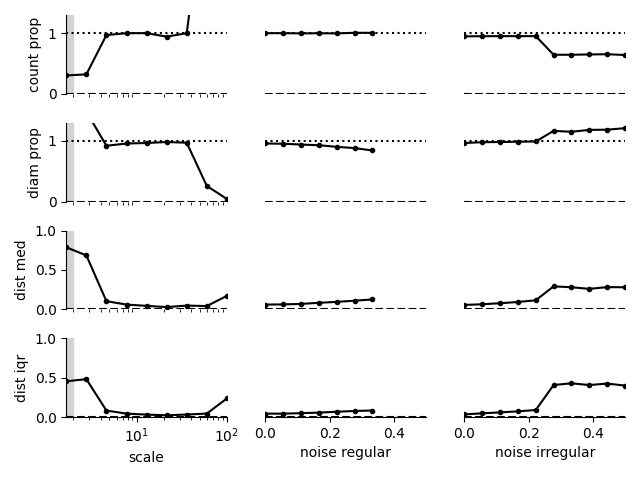

In [5]:
fig, axes = plt.subplots(ncols=3, nrows=4)
ymaxs = [1.3, 1.3, 1, 1]
ylogs = [True, False, False]
for (xvar, outcome), col, ylog in zip(results.items(), axes.T, ylogs):
    xvals = outcome['xvals']
    for num, ((yvar, yvals), ax, ymax) in enumerate(zip(list(outcome.items())[1:], col, ymaxs)):
        if yvar != 'xvals':
            print(xvals, yvals)
            ax.plot(xvals, yvals, color='k', linestyle='-', marker='.')
            ax.set_ylim(0, ymax)
            ax.set_xlim(min(xvals), max(xvals))
            ax.set_xlabel(xvar.replace("_", " "))
            ax.set_ylabel(yvar.replace("_", " "))
            # plot y=0
            ax.axhline(0, color='k', linestyle='--')
            if 'prop' in yvar:
                ax.axhline(1, color='k', linestyle=':')
            if xvar == 'scale':
                ax.axvspan(min(xvals), 2, color='lightgray', zorder=1)
            if ylog:
                ax.set_xscale('log')
# despine bottom and left for all non-marginal subplots
for ax in axes[:-1, 1:].flatten():
    sbn.despine(ax=ax, bottom=True, left=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
# despine bottom from the top 3, left marginal subplots
for ax in axes[:-1, 0]:
    sbn.despine(ax=ax, bottom=True)
    ax.set_xticks([])
    ax.set_xlabel(None)
    # ax.get_xaxis().set_visible(False)
# despine bottom from the top 3, marginal subplots
for ax in axes[-1, 1:]:
    sbn.despine(ax=ax, left=True)
    ax.set_yticks([])
    ax.set_ylabel(None)
    # ax.get_yaxis().set_visible(False)
# leave bottom left subplot normally despined
sbn.despine(ax=axes[-1, 0])
plt.tight_layout()
plt.show()

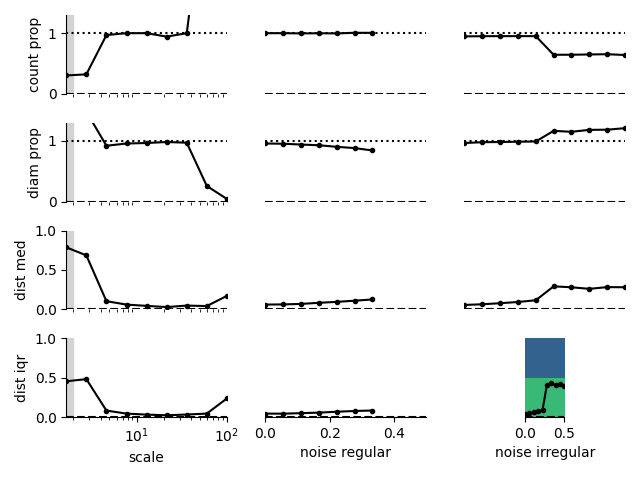

In [6]:
lattice = Lattice()
img = lattice.simulate_eye(xres=360, yres=180, scale=5)
plt.imshow(img)
plt.show()